In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


2


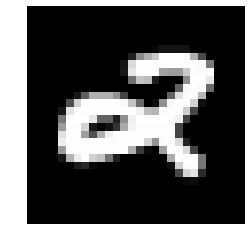

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.axis("off")
print(y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,20,20,19,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,253,254,247,175,74,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,253,254,253,253,250,122,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,155,155,200,253,253,253,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,140,254,254,231,0,0,0,0


In [15]:
from keras.models import Sequential
# Dense: 全連接層
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(256, activation="relu", input_dim=784))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.utils.np_utils import to_categorical
# 對圖片做出預處理: 攤平(1D) -> 0~1
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# 對答案做出預處理: One-Hot
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
# loss: 如何來衡量你的模型預測的多準
# optimizer: 梯度下降過程該如何更好更快
# metrics: 你還需要度量標準
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [18]:
# batch_size: 問幾個人才調整方向(梯度下降)
# epochs: 整份資料集該翻幾遍才到最好
# validation_split: 留多少%下來考試
# 一個epoch多少次調整(梯度下降): 54000(60000 - 6000) / 200 -> 270梯度下降
# verbose: 要印多少log (0: 最多(進度條), 1:完全沒有, 2:必要的就好)
mlp.fit(x_train_shape, y_train_cat,
        batch_size=200, 
        epochs=10,
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 2s - loss: 0.3770 - acc: 0.8955 - val_loss: 0.1605 - val_acc: 0.9573
Epoch 2/10
 - 2s - loss: 0.1656 - acc: 0.9533 - val_loss: 0.1169 - val_acc: 0.9688
Epoch 3/10
 - 2s - loss: 0.1142 - acc: 0.9670 - val_loss: 0.0942 - val_acc: 0.9705
Epoch 4/10
 - 2s - loss: 0.0867 - acc: 0.9758 - val_loss: 0.0850 - val_acc: 0.9742
Epoch 5/10
 - 2s - loss: 0.0676 - acc: 0.9806 - val_loss: 0.0788 - val_acc: 0.9775
Epoch 6/10
 - 2s - loss: 0.0545 - acc: 0.9847 - val_loss: 0.0727 - val_acc: 0.9782
Epoch 7/10
 - 2s - loss: 0.0435 - acc: 0.9879 - val_loss: 0.0686 - val_acc: 0.9803
Epoch 8/10
 - 2s - loss: 0.0360 - acc: 0.9904 - val_loss: 0.0710 - val_acc: 0.9795
Epoch 9/10
 - 2s - loss: 0.0298 - acc: 0.9927 - val_loss: 0.0634 - val_acc: 0.9805
Epoch 10/10
 - 2s - loss: 0.0248 - acc: 0.9939 - val_loss: 0.0656 - val_acc: 0.9817


In [19]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.06742070020711981, 0.9795]